In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import pickle

In [2]:
import os
import pickle
import numpy as np

def load_and_format_results_one_file(file_path, special_word):
    pkl_file = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
            if isinstance(results, dict):
                mean_results = {}
                std_results = {}
                for key in results[0].keys():
                    if special_word in key.lower():  # Vérifie si "volume" est dans la clé
                        # Extract values for the current key across experiments
                        values = [results[exp][key] for exp in results]

                        # Remove the minimum and maximum values
                        values_sorted = sorted(values)
                        values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)

                        # Calculate the mean of the remaining values
                        mean_results[key] = np.mean(values_trimmed)
                        std_results[key] = np.std(values_trimmed, ddof=1)  # Sample std deviation
                
                return mean_results, std_results
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
                return None, None
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
        return None, None

def load_and_format_volume_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "volume")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["volume_hyper_rectangle", "volume_covariance", "volume_local_covariance", "volume_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                if mean_results[key] == min_value:
                    formatted_result = f"\\textbf{{{mean_results[key]:.{n_numbers}f}}} \pm {std_results[key]:.{n_numbers}f}"
                else:
                    formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)

def load_and_format_coverage_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "coverage")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["coverage_hyper_rectangle", "coverage_covariance", "coverage_local_covariance", "coverage_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                
                formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)



In [3]:
# load_and_format_volume_results("new_results", alpha = 0.1, n_numbers=6)
# print("\n\n")
# load_and_format_coverage_results("new_results", alpha = 0.1)
# print("\n\n")
# load_and_format_volume_results("new_results", alpha = 0.01, n_numbers=3)
# print("\n\n")
# load_and_format_coverage_results("new_results", alpha = 0.01)
# print("\n\n")
load_and_format_volume_results("new_synthetic_results", alpha = 0.1, n_numbers=0)
print("\n\n")
load_and_format_coverage_results("new_synthetic_results", alpha = 0.1)
print("\n\n")
load_and_format_volume_results("new_synthetic_results", alpha = 0.01, n_numbers=0)
print("\n\n")
load_and_format_coverage_results("new_synthetic_results", alpha = 0.01)
print("\n\n")

The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.



The folder 'new_synthetic_results' does not exist.





In [77]:
import os
import pickle
import numpy as np

def load_and_format_results_one_file(file_path, special_word):
    pkl_file = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            results = pickle.load(f)
            if isinstance(results, dict):
                mean_results = {}
                std_results = {}
                for key in results[0].keys():
                    if special_word in key.lower():  # Vérifie si "volume" est dans la clé
                        # Extract values for the current key across experiments
                        if special_word == "volume":
                            if "rf" in pkl_file:
                                values = [results[exp][key]**(1/8) for exp in results]
                            elif "scm" in pkl_file:
                                values = [results[exp][key]**(1/16) for exp in results]
                            elif "exp" or "gau" in pkl_file:
                                values = [results[exp][key]**(1/4) for exp in results]
                            else:
                                values = [results[exp][key]**(1/2) for exp in results]
                        else:
                            values = [100*results[exp][key] for exp in results]

                        # Remove the minimum and maximum values
                        values_sorted = sorted(values)
                        values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)

                        # Calculate the mean of the remaining values
                        mean_results[key] = np.mean(values_trimmed)
                        std_results[key] = np.std(values_trimmed, ddof=1)  # Sample std deviation
                
                return mean_results, std_results
            else:
                print(f"Warning: {pkl_file} does not contain a dictionary.")
                return None, None
    except Exception as e:
        print(f"Failed to load {pkl_file}: {e}")
        return None, None

def load_and_format_volume_results(folder_path, alpha, n_numbers=3):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "volume")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["volume_hyper_rectangle", "volume_covariance", "volume_local_covariance", "volume_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                if mean_results[key] == min_value:
                    formatted_result = f"\\textbf{{{mean_results[key]:.{n_numbers}f}}} \pm {std_results[key]:.{n_numbers}f}"
                else:
                    formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)

def load_and_format_coverage_results(folder_path, alpha, n_numbers=3, n_numbers_std=1):
    """
    Load and format the contents of all .pkl files in the specified folder.
    """
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return

    pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl') and 'tab' not in f]

    if not pkl_files:
        print("No .pkl files found in the folder.")
        return
    
    all_results = {}
    for pkl_file in pkl_files:
        file_path = os.path.join(folder_path, pkl_file)
        mean_results, std_results = load_and_format_results_one_file(file_path, "coverage")
        if mean_results is not None:
            all_results[pkl_file] = (mean_results, std_results)
    
    # Generate LaTeX formatted output
    datasets = list(all_results.keys())
    keys = list(next(iter(all_results.values()))[0].keys())  # Get volume-related keys
    
    keys = ["coverage_hyper_rectangle", "coverage_covariance", "coverage_local_covariance", "coverage_ellipsoid"]

    latex_output = "Dataset " + " & " + " & ".join(keys) + "\\\\ \\hline\n"
    for dataset in sorted(datasets):  # Sorting datasets alphabetically
        if f"alpha_{alpha}" in dataset.lower():
            row = f"{dataset[:10].replace('_', ' ')} "  # Display only the first 10 characters of dataset with underscores replaced by spaces
            mean_results, std_results = all_results[dataset]
            for key in keys:
                # Find the smallest value in the row for the current dataset
                values = [mean_results[k] for k in keys]
                min_value = min(values)
                
                # Format the result, applying \textbf to the smallest value
                
                # formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers}f}"
                formatted_result = f"{mean_results[key]:.{n_numbers}f} \pm {std_results[key]:.{n_numbers_std}f}"
                
                row += f" & ${formatted_result}$ "
            row += "\\\\ \\hline\n"
            latex_output += row

    print(latex_output)



In [78]:
load_and_format_volume_results("volume", alpha = 0.1, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume", alpha = 0.1, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume", alpha = 0.01, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume", alpha = 0.01, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume_s", alpha = 0.1, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume_s", alpha = 0.1, n_numbers=1, n_numbers_std=1)
print("\n\n")
load_and_format_volume_results("volume_s", alpha = 0.01, n_numbers=2)
print("\n\n")
load_and_format_coverage_results("volume_s", alpha = 0.01, n_numbers=1, n_numbers_std=1)
print("\n\n")

Dataset  & volume_hyper_rectangle & volume_covariance & volume_local_covariance & volume_ellipsoid\\ \hline
Bias corre  & $1.14 \pm 0.01$  & $\textbf{1.12} \pm 0.02$  & $1.20 \pm 0.04$  & $1.15 \pm 0.09$ \\ \hline
casp01 CAS  & $1.18 \pm 0.00$  & $1.23 \pm 0.01$  & $1.20 \pm 0.01$  & $\textbf{1.15} \pm 0.01$ \\ \hline
energy01 e  & $1.13 \pm 0.05$  & $1.04 \pm 0.08$  & $1.04 \pm 0.08$  & $\textbf{0.98} \pm 0.07$ \\ \hline
house01 ho  & $1.17 \pm 0.01$  & $1.18 \pm 0.01$  & $1.18 \pm 0.01$  & $\textbf{1.15} \pm 0.01$ \\ \hline
rf101 rf1   & $0.43 \pm 0.02$  & $0.44 \pm 0.02$  & $0.64 \pm 0.03$  & $\textbf{0.39} \pm 0.05$ \\ \hline
rf201 rf2   & $0.61 \pm 0.01$  & $0.42 \pm 0.02$  & $0.44 \pm 0.02$  & $\textbf{0.35} \pm 0.01$ \\ \hline
scm1d 10 a  & $2.71 \pm 0.09$  & $1.74 \pm 0.06$  & $1.74 \pm 0.06$  & $\textbf{1.47} \pm 0.08$ \\ \hline
scm20d 10   & $3.45 \pm 0.47$  & $2.64 \pm 0.49$  & $2.64 \pm 0.49$  & $\textbf{1.51} \pm 0.03$ \\ \hline
taxi01 tax  & $1.87 \pm 0.01$  & $1.85 \pm 0

In [71]:
file_path = "../results/volume/scm1d_10_adjusting_center_0.7_0.1_alpha_0.01_256_256_loss_strategy_log_volumeschedulerTrue.pkl"

with open(file_path, 'rb') as f:
    results = pickle.load(f)
    all_values = []
    if isinstance(results, dict):
        mean_results = {}
        std_results = {}
        for key in results[0].keys():
            if "volume" in key.lower():  # Vérifie si "volume" est dans la clé
                if "rf" in file_path:
                    values = [results[exp][key]**(1/8) for exp in results]
                elif "scm" in file_path:
                    values = [results[exp][key]**(1/16) for exp in results]
                    values = [results[exp][key]/results[exp]["volume_ellipsoid"] for exp in results]
                    # values = [results[exp][key] for exp in results]
                    # values_sorted = sorted(values)
                    # values_trimmed = values_sorted[1:-1]
                    all_values.append(values_trimmed)
                    # all_values.append(values)
                    print(values)
                
                    
        
            # Remove the minimum and maximum values
            values_sorted = sorted(values)
            values_trimmed = values_sorted[1:-1]  # Exclude first (min) and last (max)

            # Calculate the mean of the remaining values
            mean_results[key] = np.mean(values_trimmed)
            std_results[key] = np.std(values_trimmed, ddof=1)  # Sample std deviation

print(mean_results)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.2324184768065621, 1.3937133671351531, 0.8426064299351247, 0.48909399569221373, 0.4618905316223184, 3.974744926427402, 0.2668796128739387, 4.413442655477285, 3.2056281631328276, 0.013408183577432727]
[0.23241847680656333, 1.3937133671351596, 0.8426064299351258, 0.48909399569221407, 0.46189053162231947, 3.974744926427408, 0.26687961287393885, 4.413442655477327, 3.2056281631328187, 0.013408183577432634]
[2.598262233910916, 48.80951619992196, 71.71202331544616, 0.27835961902548584, 29.685170524622333, 161.32024271990437, 0.19048810108004444, 1.2170780652132873, 1509.736932578124, 0.02355678604926724]
{'volume_ellipsoid': 1.0, 'volume_covariance': 1.3583719379531924, 'volume_local_covariance': 1.3583719379531936, 'volume_hyper_rectangle': 39.47639259739057, 'coverage_ellipsoid': 39.47639259739057, 'coverage_covariance': 39.47639259739057, 'coverage_local_covariance': 39.47639259739057, 'coverage_hyper_rectangle': 39.47639259739057}


In [72]:
all_values = np.array(all_values)
print(all_values.shape)

(4, 8)


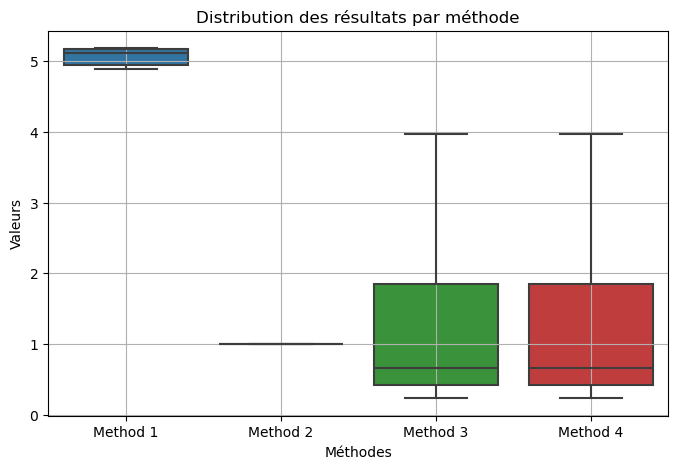

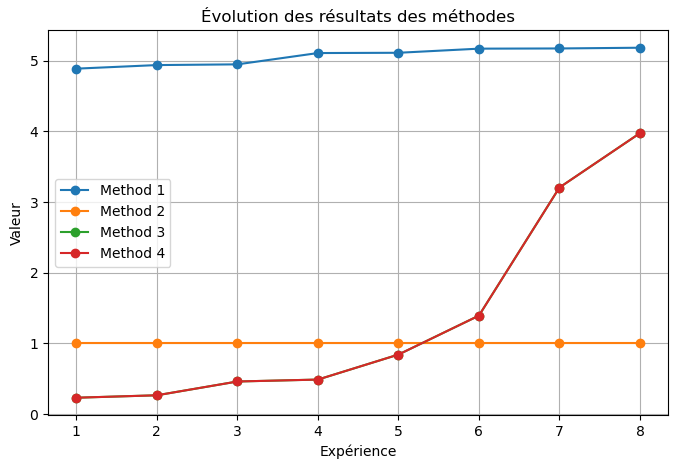

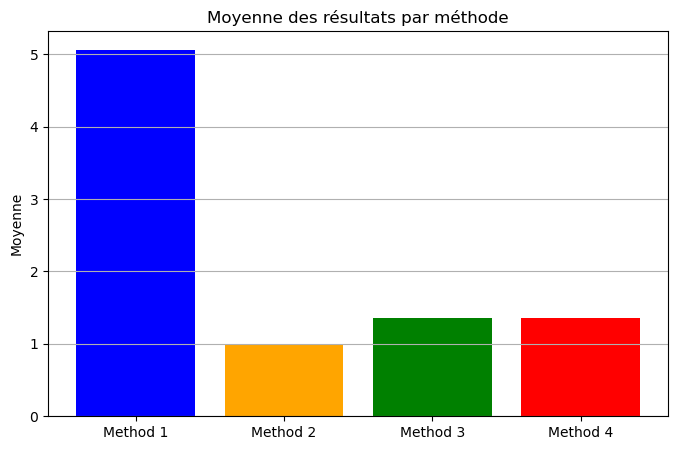

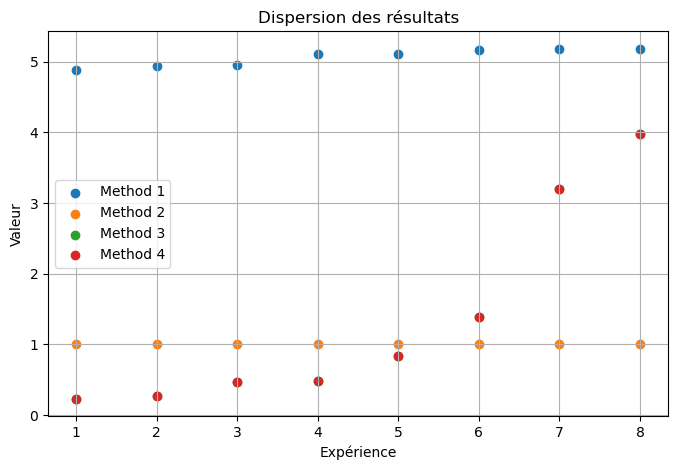

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Générer des données factices
np.random.seed(42)

# Noms des méthodes et expériences
method_names = [f"Method {i+1}" for i in range(4)]
experiment_ids = np.arange(1, all_values.shape[1] + 1)

# --- Boxplot ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=all_values.T)
plt.xticks(ticks=range(4), labels=method_names)
plt.title("Distribution des résultats par méthode")
plt.xlabel("Méthodes")
plt.ylabel("Valeurs")
plt.grid()
plt.show()

# --- Courbes des expériences ---
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.plot(experiment_ids, all_values[i], marker="o", label=method_names[i])
plt.title("Évolution des résultats des méthodes")
plt.xlabel("Expérience")
plt.ylabel("Valeur")
plt.legend()
plt.grid()
plt.show()

# --- Barres des moyennes ---
plt.figure(figsize=(8, 5))
means = all_values.mean(axis=1)
plt.bar(method_names, means, color=['blue', 'orange', 'green', 'red'])
plt.title("Moyenne des résultats par méthode")
plt.ylabel("Moyenne")
plt.grid(axis='y')
plt.show()

# --- Scatter Plot ---
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.scatter(experiment_ids, all_values[i], label=method_names[i])
plt.title("Dispersion des résultats")
plt.xlabel("Expérience")
plt.ylabel("Valeur")
plt.legend()
plt.grid()
plt.show()
